## Data Exploration and Analysis
We want to perform Exploratory Data Analysis (EDA) over the merged data set from the data_prep notebook. But, before that we need to clean the data, look for unwanted examples (e.g. salaries < 0), look for duplicates, or currupt data. 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
sys.path.insert(0, './helpers')
# now read in the helper functions
from helper import merge_data

In [2]:
# Load the training data set we want to explore
train_df = pd.read_csv('./derived_data/train_data_merged.csv')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [3]:
# Let's see how big the data set is
train_df.shape

(1000000, 9)

We have 1 million samples for the training and validation. Also, there are 7 features in our data set if we don't count jobId and salary.

### Check for duplicates

In [4]:
# How many unique samples we have
print(train_df.jobId.nunique())

1000000


We don't have any duplicates. Good to go.

In [5]:
# How may samples have salaries 0. And, Why?
zeros_in_salary = train_df[train_df.salary == 0]
print(zeros_in_salary.shape)
zeros_in_salary

(5, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


So there are 5 records in our data set with zero salary. If we think this through as why these would be zero then it can simply be assumed as data entry issue. Our data set is of 1 million rows and 5 samples having zero salary shold not be a problem. But, we will get rid of them anyways.

In [6]:
# Lets get rid of the rows with zeros in salary as they are useless to us
train_df = train_df[train_df.salary != 0]
train_df.shape

(999995, 9)

The above code takes all the rows except the one has 0 in salary column. Thereby, dropping the unwanted entries. 

### Explore Unique Values


In [7]:
train_df.nunique().sort_values(ascending = False).head(9)

jobId                  999995
salary                    279
milesFromMetropolis       100
companyId                  63
yearsExperience            25
major                       9
jobType                     8
industry                    7
degree                      5
dtype: int64

### Inspect the Target Variable

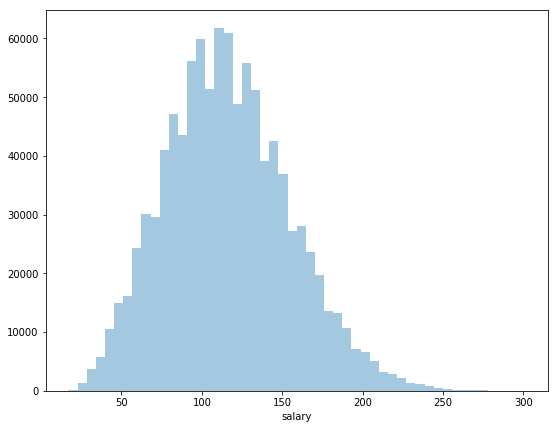

In [43]:
plt.figure(figsize=(9, 7))
sns.distplot(train_df.salary, hist=True, kde=False)

### Inspect Feature Variables

Let's dive into each of the features to see if we can find some pattern or correlation between our target variable and features. We have a data set of 1 million data points and overplotting of such data set is a common problem in DataViz. To avoid this, we will use jitter in all of our feature plots.

#### Experience vs. Salary
Generally with many years of experience, salary increases. Below graph shows relation between salary (in thousand) and experience in years.

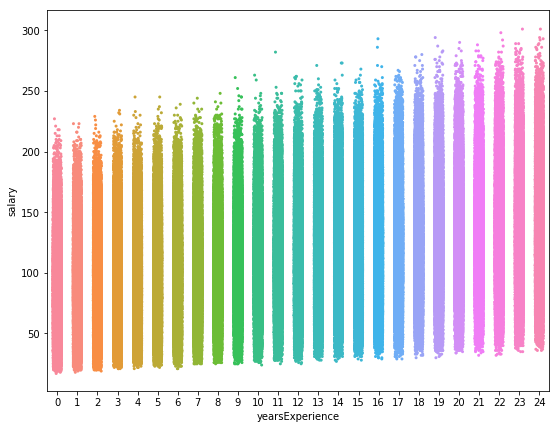

In [44]:
plt.figure(figsize=(9, 7))
sns.stripplot(train_df.yearsExperience, train_df.salary, jitter=0.2, size=3)

#### Major vs. Salary
Certainly, how much you earn does not depend on your education. Though few backgrounds have a higher influence on how much a person makes. As you can see in the below plot, subjects with Engineering or Business seem to rake a higher income than others. 

One interesting conclusion can be made here if you look at the label "None" in X-axis below. These are people either with no major at all or the data is corrupt in this column for which we will have to do something while we do feture engineering. 

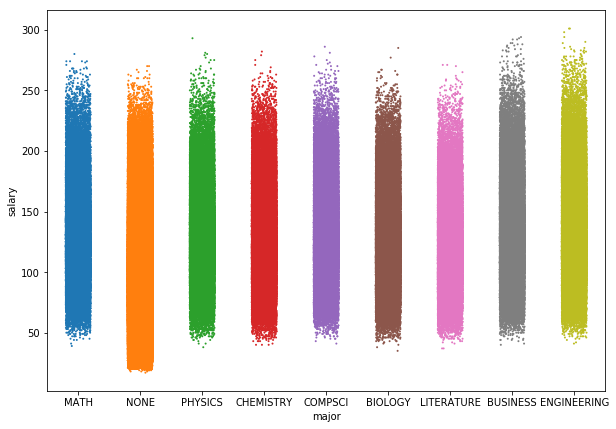

In [16]:
plt.figure(figsize=(10, 7))
sns.stripplot(train_df.major, train_df.salary, jitter=0.2, size=2)

#### Job Type vs. Salary
This part is kind of obvious that more challenging your job is the more you earn. Executive level employees like CEO or CTO earns more than any other employee. That's what you will be able to see here in the plot below.

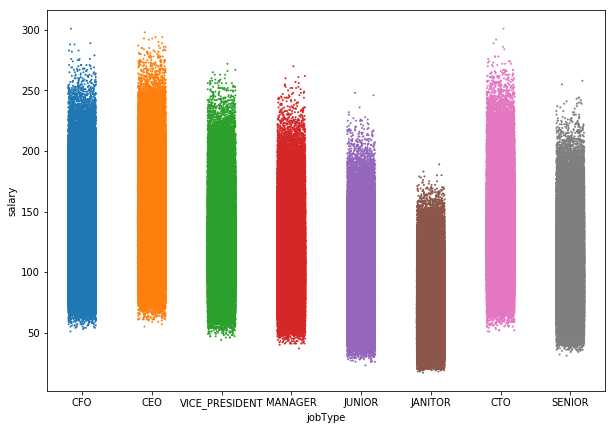

In [17]:
plt.figure(figsize=(10, 7))
sns.stripplot(train_df.jobType, train_df.salary, jitter=0.2, size=2)

#### Industry vs. Salary


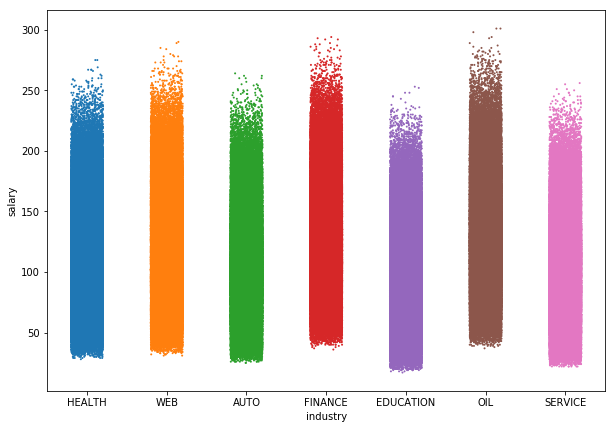

In [18]:
plt.figure(figsize=(10, 7))
sns.stripplot(train_df.industry, train_df.salary, jitter=0.2, size=2)

#### Degree vs. Salary


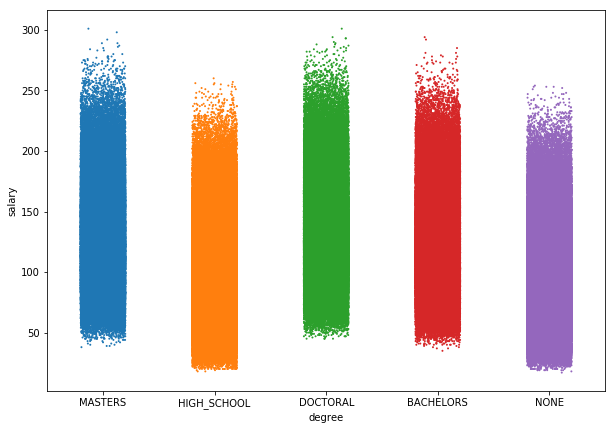

In [19]:
plt.figure(figsize=(10, 7))
sns.stripplot(train_df.degree, train_df.salary, jitter=0.2, size=2)